In [1]:
import gym
import gym.spaces

In [2]:
# all of the titles we will be general game playing on
gymEnvNames = ['Alien-v0','Asteroids-v0','Atlantis-v0','BankHeist-v0',
               'BattleZone-v0','Bowling-v0','Boxing-v0','Centipede-v0',
               'ChopperCommand-v0','DoubleDunk-v0','FishingDerby-v0',
               'Freeway-v0','Frostbite-v0','Gravitar-v0','Hero-v0',
               'IceHockey-v0','Jamesbond-v0','Kangaroo-v0','Krull-v0',
               'KungFuMaster-v0','MsPacman-v0','PrivateEye-v0',
               'RoadRunner-v0','Skiing-v0','Tennis-v0','TimePilot-v0',
               'UpNDown-v0','Venture-v0','WizardOfWor-v0','Zaxxon-v0']

In [3]:
# test to see if faster to create new env everytime, or serialize, for mp
import multiprocessing as mp
import time

# functions to test gym env access methods

# just create new env every time
def funCreate(envName):
    tStart = time.time()
    env = gym.make(envName)
    env.close()
    tEnd = (time.time() - tStart) * 1000
    
    return tEnd
    
# or load from a queue (serializes and deserializes)
def funLoad(args):
    eq = args[0]
    qt = args[1]
    
    tStart = time.time()
    env = eq.get()
    eq.put(env)
    tEnd = (time.time() - tStart) * 1000
    
    qt.append(tEnd)

In [4]:
# track times to create / use queue with multiprocessing
createTimes = []
queueTimes = []

# create
for envName in gymEnvNames:
    for i in range(10): # repeat 10 times for stochasticity
        createTimes.append(funCreate(envName))

# create all envs at once, don't count time, because it would only happen
# once, at the very begining of a huge run
envs = []
for envName in gymEnvNames:
    envs.append(gym.make(envName))
# use queue / load
pool = mp.Pool(processes=1)
m = mp.Manager()
qTimes = m.list()
for env in envs:
    envQueue = m.Queue()
    envQueue.put(env)
    pool.map(funLoad, [(envQueue, qTimes)]*10) # repeat 10 times
    
for time in qTimes: # put in normal list
    queueTimes.append(time)

Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/home/ryan/anaconda3/envs/oaigym3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ryan/anaconda3/envs/oaigym3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ryan/anaconda3/envs/oaigym3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ryan/anaconda3/envs/oaigym3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/ryan/anaconda3/envs/oaigym3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/ryan/anaconda3/envs/oaigym3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/ryan/anaconda3/envs/oaigym3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(h

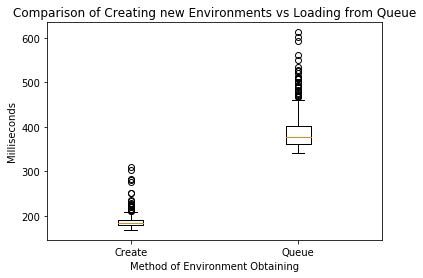

In [6]:
# plot results
import matplotlib.pyplot as plt
plt.boxplot([createTimes,queueTimes], labels=['Create', 'Queue'])
plt.title('Comparison of Creating new Environments vs Loading from Queue')
plt.xlabel('Method of Environment Obtaining')
plt.ylabel('Milliseconds')
plt.show()

So it is certainly much faster to create a new environment (for these Atari ones at-least) than to pass it over in a queue for multiprocessing. Though episodes are so long it doesn't matter too much.

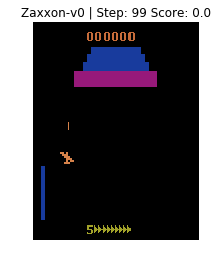

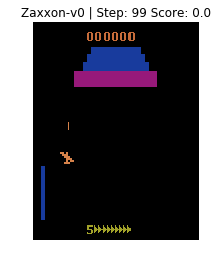

In [14]:
%matplotlib inline

# see a short bit of each game to see what it looks like

from IPython.display import clear_output
from IPython import display

# how to render in Jupyter: 
# https://stackoverflow.com/questions/40195740/how-to-run-openai-gym-render-over-a-server
# https://www.youtube.com/watch?v=O84KgRt6AJI
def show_state(env, step=0, name='', info=''):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (name, step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())
    

for envName in gymEnvNames:
    env = gym.make(envName)
    env.reset()
    score = 0
    for i in range(100): # run episodes that last 200 frames
        show_state(env, i, envName, 'Score: ' + str(score))
        _, reward, isDone, _ = env.step(env.action_space.sample())
        score += reward
        if isDone:
            break
            
    env.close()

In [11]:
# see action space to chose largest
for envName in gymEnvNames:
    env = gym.make(envName)
    print(env.action_space)
    
# 18 is the size

Discrete(18)
Discrete(14)
Discrete(4)
Discrete(18)
Discrete(18)
Discrete(6)
Discrete(18)
Discrete(18)
Discrete(18)
Discrete(18)
Discrete(18)
Discrete(3)
Discrete(18)
Discrete(18)
Discrete(18)
Discrete(18)
Discrete(18)
Discrete(18)
Discrete(18)
Discrete(14)
Discrete(9)
Discrete(18)
Discrete(18)
Discrete(3)
Discrete(18)
Discrete(10)
Discrete(6)
Discrete(18)
Discrete(10)
Discrete(18)
